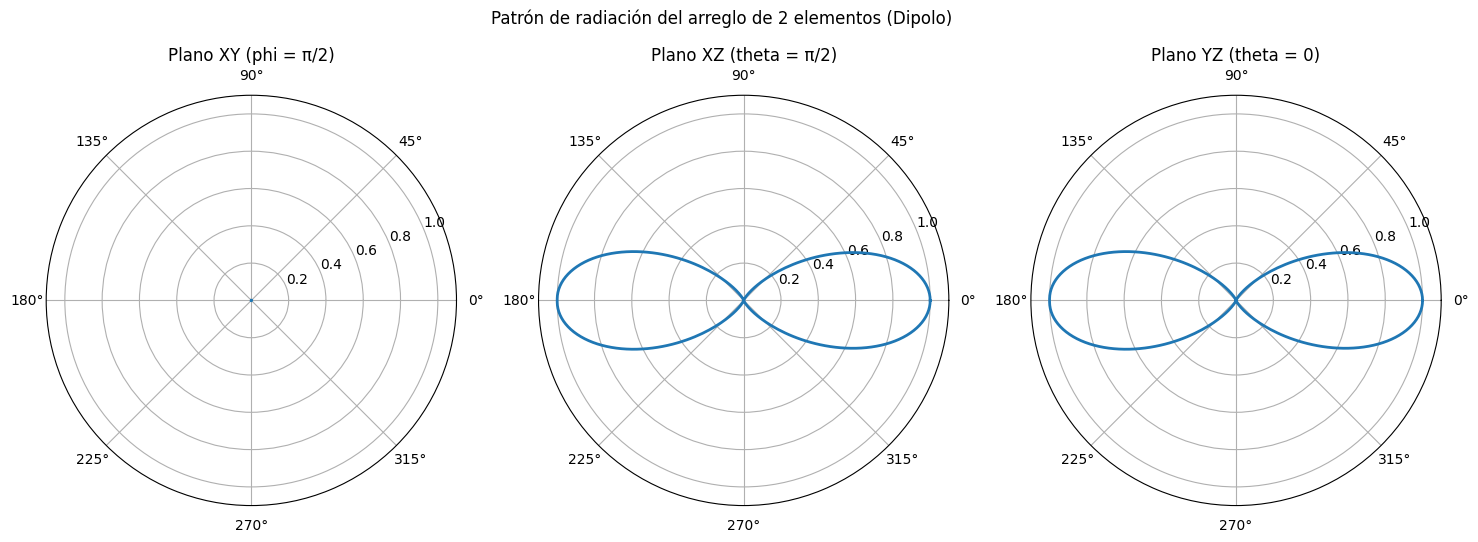

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales
f = 1e9  # Frecuencia en Hz (1 GHz)
c = 3e8  # Velocidad de la luz en m/s
lambda_0 = c / f  # Longitud de onda en metros
k = 2 * np.pi / lambda_0  # Número de onda
d_var = lambda_0 / 2  # Separación entre elementos (λ/2)
N = 2  # Número de elementos
eficiencia = 0.9  # Eficiencia de la antena (90%)
d_dip = 0.15  # Longitud del dipolo corto en metros (15 cm)

# Tipo de arreglo: "isotropico" o "dipolo"
tipo_arreglo = "dipolo"  # Cambiar entre "isotropico" y "dipolo"

# Polarización del dipolo: "X", "Y" o "Z"
polarizacion = "Z"

# Coordenadas de los elementos a lo largo del eje X
x_positions = np.linspace(-d_var * (N - 1) / 2, d_var * (N - 1) / 2, N)

# Definición del patrón de radiación en coordenadas esféricas
theta = np.linspace(0, 2 * np.pi, 360)  # Rango completo de 0 a 2*pi
phi = np.linspace(0, np.pi, 180)  # Rango de 0 a pi
theta, phi = np.meshgrid(theta, phi)

# Coordenadas en el espacio
X = np.sin(phi) * np.cos(theta)
Y = np.sin(phi) * np.sin(theta)
Z = np.cos(phi)

# Cálculo del patrón de radiación para cada tipo de arreglo
E_total = np.zeros(X.shape, dtype=complex)

if tipo_arreglo == "isotropico":
    # Arreglo de fuentes isotrópicas
    for x in x_positions:
        E_total += np.exp(1j * k * x * np.sin(phi) * np.cos(theta))

elif tipo_arreglo == "dipolo":
    # Arreglo de dipolos cortos
    if polarizacion == "X":
        # Factor de patrón de radiación de dipolos cortos polarizados en X
        F_theta = np.cos(theta) * np.sin(phi)
    elif polarizacion == "Y":
        # Factor de patrón de radiación de dipolos cortos polarizados en Y
        F_theta = np.sin(theta) * np.sin(phi)
    elif polarizacion == "Z":
        # Factor de patrón de radiación de dipolos cortos polarizados en Z
        F_theta = np.cos(phi)
    
    # Campo radiado de un dipolo corto (polarizado en X, Y o Z)
    E_element = F_theta * np.sin(k * d_dip / 2 * np.cos(phi)) / (k * d_dip / 2 * np.cos(phi))
    E_element[np.isnan(E_element)] = 1  # Corrección para indeterminación en phi = pi/2

    # Sumar la contribución de cada dipolo en el arreglo
    for x in x_positions:
        E_total += E_element * np.exp(1j * k * x * np.sin(phi) * np.cos(theta))

# Patrón de radiación total normalizado
E_total = np.abs(E_total) ** 2
E_total /= np.max(E_total)  # Normalización

# Extraer datos para los planos específicos
E_xy = E_total[int(phi.shape[0] / 2), :]  # Corte en el plano XY (phi = pi/2)
E_xz = E_total[:, int(theta.shape[1] / 2)]  # Corte en el plano XZ (theta = pi/2)
E_yz = E_total[:, 0]  # Corte en el plano YZ (theta = 0)

# Generar ángulos completos para las gráficas polares (0 a 2*pi)
angles_theta = np.linspace(0, 2 * np.pi, len(E_xy))  # Para plano XY
angles_phi = np.linspace(0, 2 * np.pi, 2 * len(E_xz))  # Duplicar ángulos para XZ y YZ

# Crear los datos duplicados para gráficos polares completos
E_xz_full = np.concatenate((E_xz, E_xz[::-1]))
E_yz_full = np.concatenate((E_yz, E_yz[::-1]))

# Cortes en planos XY, XZ, YZ
fig = plt.figure(figsize=(18, 6))

# Corte XY (phi = pi/2)
ax1 = fig.add_subplot(131, polar=True)
ax1.plot(angles_theta, E_xy, linewidth=2)
ax1.set_title('Plano XY (phi = π/2)')
ax1.set_ylim(0, 1.1)  # Ajustar límites

# Corte XZ (theta = pi/2)
ax2 = fig.add_subplot(132, polar=True)
ax2.plot(angles_phi, E_xz_full, linewidth=2)
ax2.set_title('Plano XZ (theta = π/2)')
ax2.set_ylim(0, 1.1)  # Ajustar límites

# Corte YZ (theta = 0)
ax3 = fig.add_subplot(133, polar=True)
ax3.plot(angles_phi, E_yz_full, linewidth=2)
ax3.set_title('Plano YZ (theta = 0)')
ax3.set_ylim(0, 1.1)  # Ajustar límites

# Mostrar gráficos
plt.suptitle(f'Patrón de radiación del arreglo de {N} elementos ({tipo_arreglo.capitalize()})')
plt.show()
